## Exploratory Data Analysis

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:.2f}'.format)

In [54]:
# Import the data

df_sf = pd.read_csv('data\cleaned_data.csv')

In [57]:
# Identify the top 10 least expensive towns to buy a single family home in the data set (average price) 

least_expensive_town = df_sf.groupby('town')['sale_amount'].mean().reset_index().sort_values( by= 'sale_amount' ).head(10)
least_expensive_town

,town,sale_amount
162,Windham,159641.35
150,Waterbury,166734.98
41,East Hartford,169507.95
88,New Britain,170894.60
103,Norwich,183206.12
142,Torrington,187805.78
79,Meriden,191601.31
63,Hartford,200235.01
110,Plymouth,200436.88
48,Enfield,203203.99


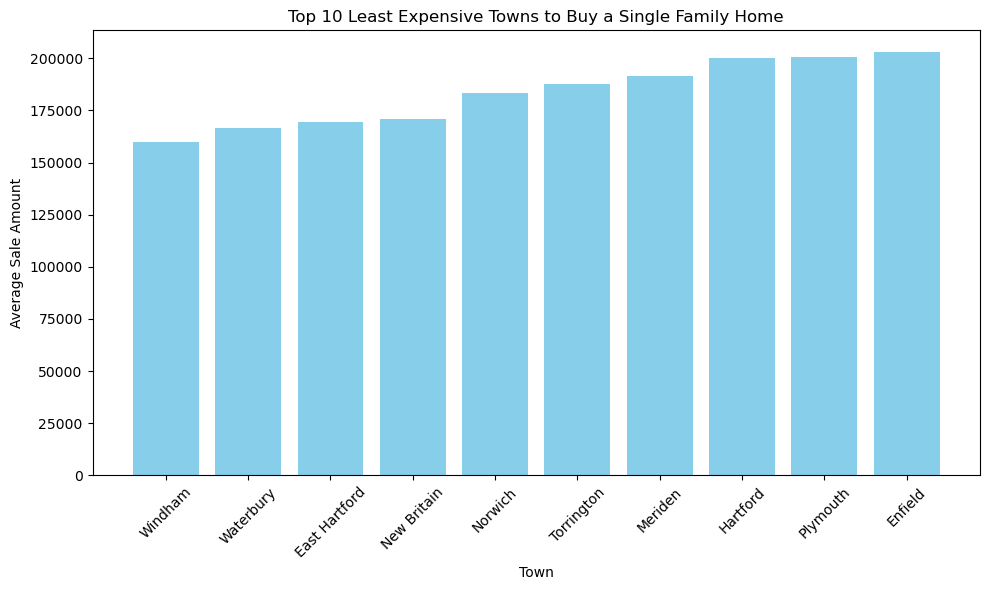

In [25]:
# Plot the results

plt.figure(figsize=(10,6))
plt.bar(least_expensive_town['town'], least_expensive_town['sale_amount'], color='skyblue')
plt.xlabel('Town')
plt.ylabel('Average Sale Amount')
plt.title('Top 10 Least Expensive Towns to Buy a Single Family Home')
plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()

Insight:

 Average sale price in the data set is the lowest for Windham at $159,641.

In [26]:
# Identify the top 10 most expensive towns to buy a single family home in the data set (average price) 

most_expensive_town = df_sf.groupby('town')['sale_amount'].mean().reset_index().sort_values( by= 'sale_amount', ascending = False).head(10)
most_expensive_town

,town,sale_amount
56,Greenwich,2473378.10
89,New Canaan,1803978.21
34,Darien,1695536.88
157,Westport,1495671.26
149,Washington,1102788.11
156,Weston,1016079.18
119,Roxbury,984581.44
160,Wilton,943568.00
148,Warren,827111.72
117,Ridgefield,799631.02


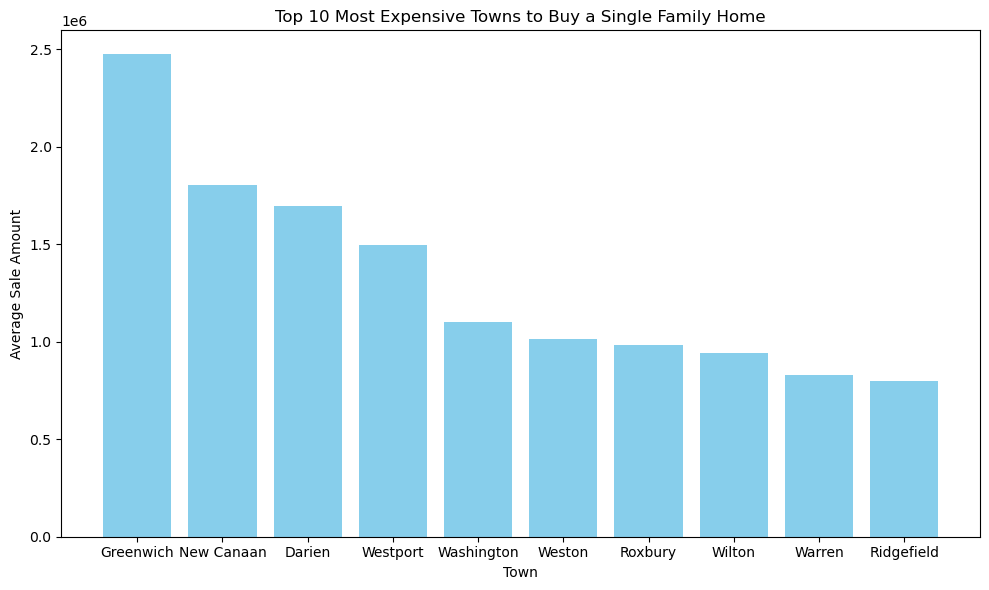

In [27]:
# Plot the results

plt.figure(figsize=(10,6))
plt.bar(most_expensive_town['town'], most_expensive_town['sale_amount'], color='skyblue')
plt.xlabel('Town')
plt.ylabel('Average Sale Amount')
plt.title('Top 10 Most Expensive Towns to Buy a Single Family Home')
plt.tight_layout()

plt.show()

Insight:

 Average sale price in the data set is the highest for Greenwich at $2,473,378. Which makes sense as it is considered as one of the 'wealthiest' towns in CT, likely due to its proximity to New York City and the proximity to the coast

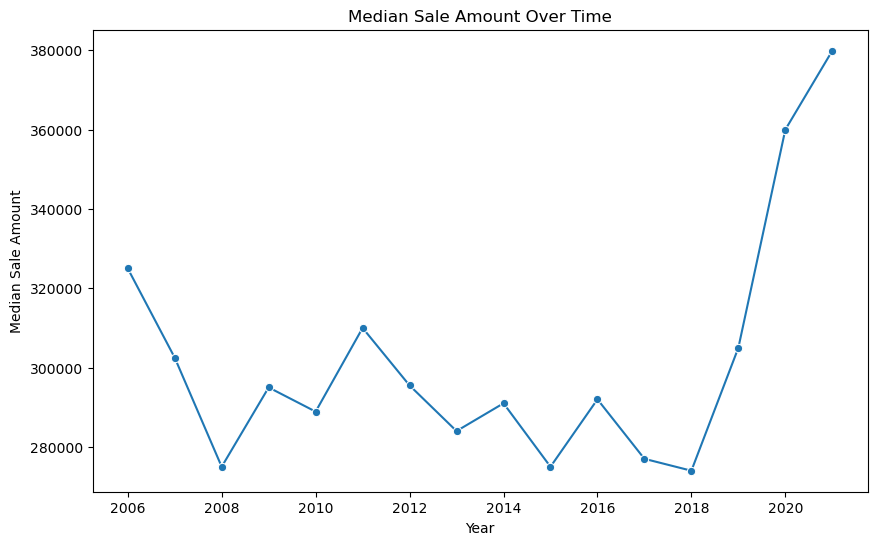

In [38]:
# Time-Series Analysis: Sale Amount Over Time
df_grouped_sale = df_sf.groupby('list_year')['sale_amount'].median().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped_sale, x='list_year', y='sale_amount', marker='o')
plt.title('Median Sale Amount Over Time')
plt.xlabel('Year')
plt.ylabel('Median Sale Amount')
plt.show()

Insight:

-The median sale amount fluctuates between 2006 and 2018, with no clear upward or downward trend. However, there is a dramatic increase starting in 2019, with sale amounts reaching their highest point in 2020.

-The relatively flat median sale amount from 2006 to 2018 suggests a stable or stagnant housing market during this period, possibly with no significant economic booms or busts influencing home prices.

-The spike in 2020 might indicate a surge in housing demand, possibly driven by factors such as lower interest rates or the pandemic-related desire for more living space. This aligns with what has been observed in many real estate markets where prices surged due to shifting consumer behaviors during COVID-19.

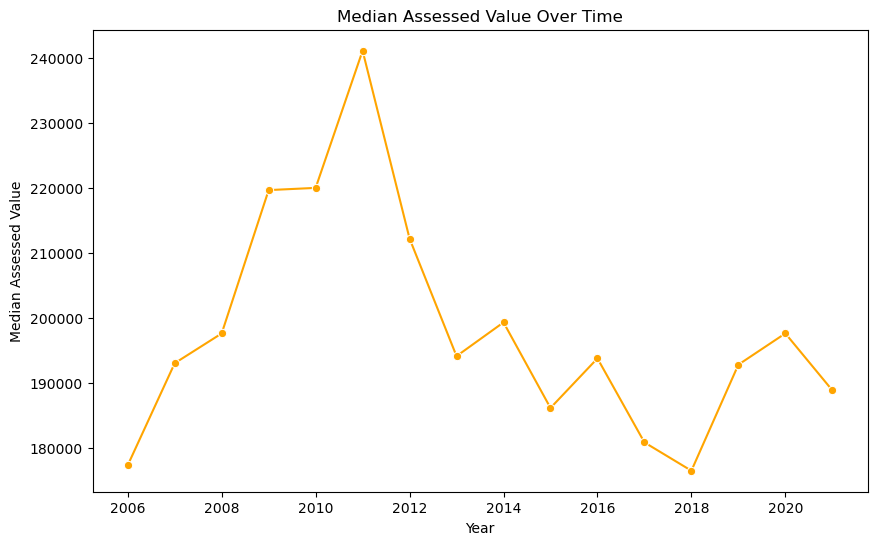

In [39]:
# Time-Series Analysis: Assessed Value Over Time
df_grouped_assessed = df_sf.groupby('list_year')['assessed_value'].median().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped_assessed, x='list_year', y='assessed_value', marker='o', color='orange')
plt.title('Median Assessed Value Over Time')
plt.xlabel('Year')
plt.ylabel('Median Assessed Value')
plt.show()


Insight: 

-The median assessed value peaks around 2011–2012 and declines steadily from 2013 to 2018, with small increases in 2019 and 2020.

-The peak around 2011 could be the result of assessments being based on pre-2008 housing boom values, or delayed reactions to market conditions.

-The gradual decline from 2013 to 2018 reflects a market correction, where assessed values were adjusted downward, possibly in response to the lingering effects of the 2008 housing crisis.

-The small increases in 2019 and 2020 suggest that the assessed values were starting to reflect the recovering housing market, though they didn't keep pace with the sharp rise in sale amounts during this period (as seen in the first graph).

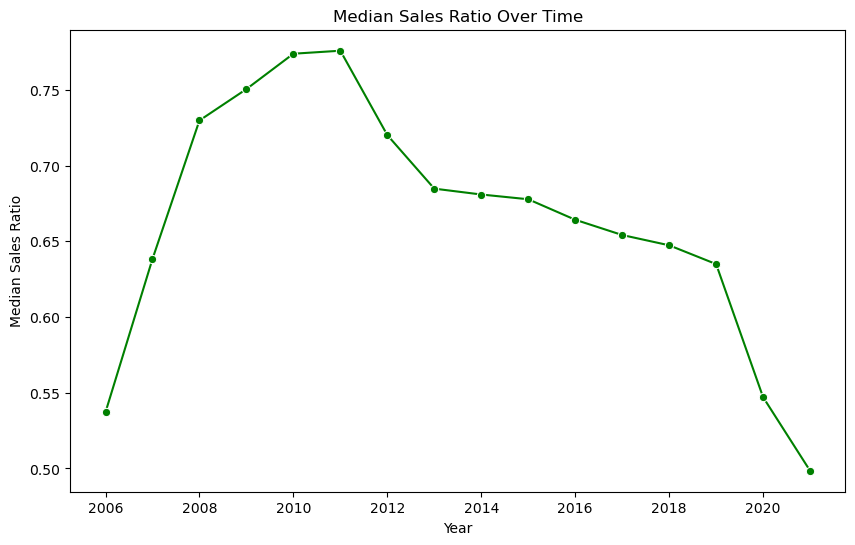

In [30]:
# Sales Ratio Change Over Time
df_grouped_ratio = df_sf.groupby('list_year')['sales_ratio'].median().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped_ratio, x='list_year', y='sales_ratio', marker='o', color='green')
plt.title('Median Sales Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Median Sales Ratio')
plt.show()


Insight:

-From 2006 to 2011, properties were selling closer to or even above their assessed value, which suggests that housing demand might have been high during that period.

-The steady decline after 2011 indicates that homes were increasingly selling below their assessed values. This may reflect cooling demand or a housing market downturn, likely influenced by economic factors such as the aftermath of the 2008 financial crisis.

-The sharp drop in 2020 could reflect the impacts of the COVID-19 pandemic on the housing market, with properties selling for significantly less than their assessed values.

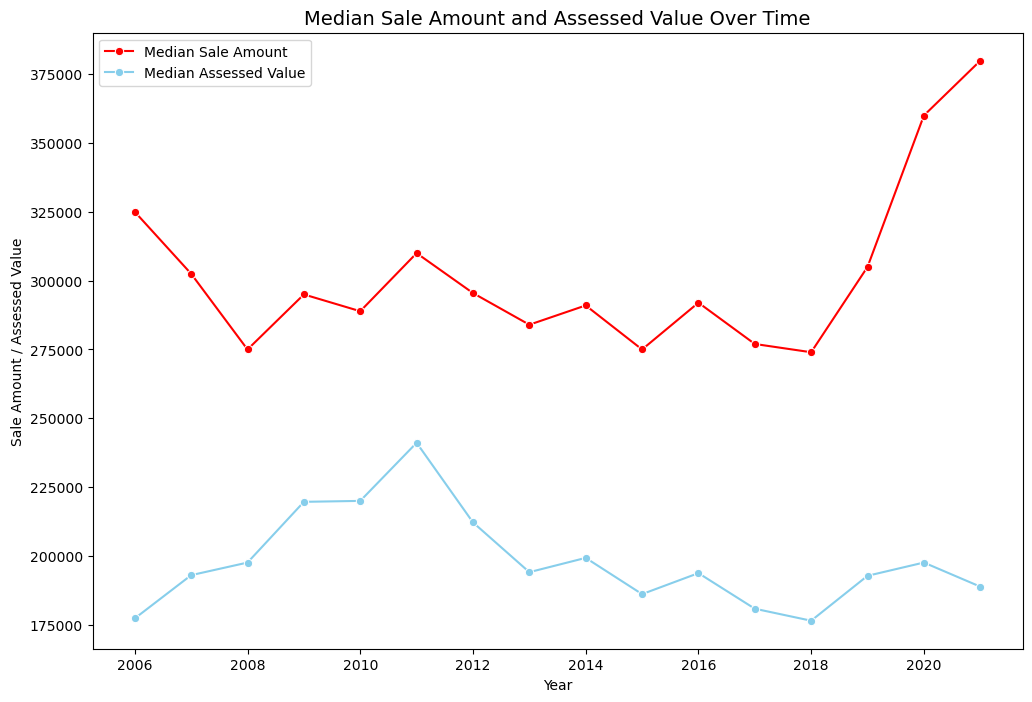

In [50]:
# Time-Series Analysis: Sale Amount and Assessed Value Over Time
df_grouped_sale = df_sf.groupby('list_year')['sale_amount'].median().reset_index()
df_grouped_assessed = df_sf.groupby('list_year')['assessed_value'].median().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Median Sale Amount on the y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Sale Amount / Assessed Value', color='black')
sns.lineplot(data=df_grouped_sale, x='list_year', y='sale_amount', marker='o', label='Median Sale Amount', ax=ax1, color='red')
sns.lineplot(data=df_grouped_assessed, x='list_year', y='assessed_value', marker='o', label='Median Assessed Value', ax=ax1, color='skyblue')

# Title and legends
plt.title('Median Sale Amount and Assessed Value Over Time', fontsize=14)
ax1.legend(loc='upper left') 

# Show the plot
plt.show()

In [11]:
# Drop the town column

df_sf = df_sf.drop(columns = {'town'})

### Examine Data Spread and Skewness

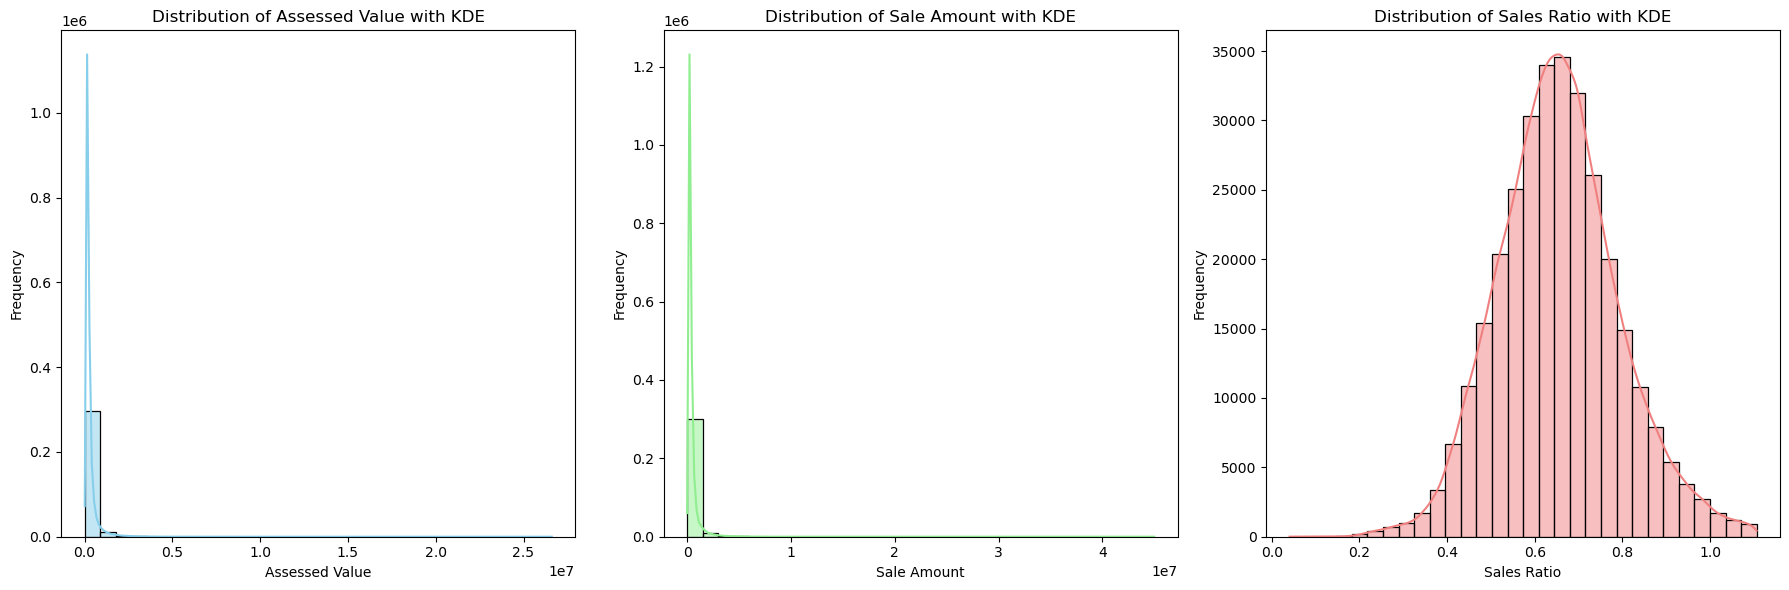

In [13]:
plt.figure(figsize=(18, 6))

# Plotting Assessed Value distribution 
plt.subplot(1, 3, 1)
sns.histplot(df_sf['assessed_value'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Assessed Value')
plt.ylabel('Frequency')
plt.title('Distribution of Assessed Value with KDE')

# Plotting Sale Amount distribution 
plt.subplot(1, 3, 2)
sns.histplot(df_sf['sale_amount'], bins=30, kde=True, color='lightgreen', edgecolor='black')
plt.xlabel('Sale Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Amount with KDE')

# Plotting Sales Ratio distribution 
plt.subplot(1, 3, 3)
sns.histplot(df_sf['sales_ratio'], bins=30, kde=True, color='lightcoral', edgecolor='black')
plt.xlabel('Sales Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Sales Ratio with KDE')

plt.tight_layout()
plt.show()



In [14]:
# Get Skew Values for the Features

print(f"Skewness for Sales Ratio: {df_sf['sales_ratio'].skew()}")
print(f"Skewness for Assessed Value: {df_sf['assessed_value'].skew()}")
print(f"Skewness for Sale Amount: {df_sf['sale_amount'].skew()}")

Skewness for Sales Ratio: 0.2050276460734686
Skewness for Assessed Value: 9.241758595344937
Skewness for Sale Amount: 10.795510051078555


Insight:

The skewness values reveal interesting patterns in the dataset. Both the sale amount (10.80) and assessed value (9.24) exhibit a significant positive skew, which aligns with the presence of extremely high-priced home sales in the data. This suggests that a small number of expensive properties are driving the skew. In contrast, the sales ratio (0.21) shows minimal skew, indicating a more balanced distribution for this variable.

-----------------------------------------------------

####  Assessed Value vs. Sale Amount

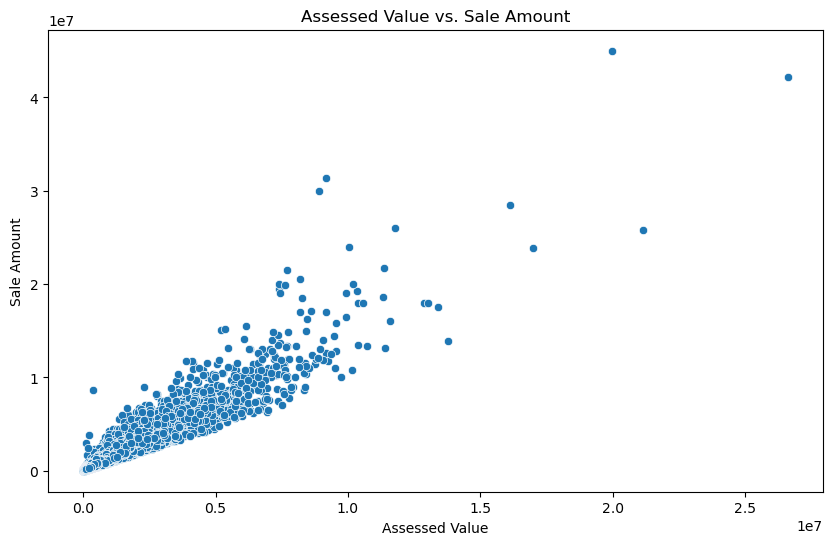

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sf, x='assessed_value', y='sale_amount')
plt.title('Assessed Value vs. Sale Amount')
plt.xlabel('Assessed Value')
plt.ylabel('Sale Amount')
plt.show()


Insight:

The scatter plot reveals a strong positive correlation between assessed value and sale amount. As the assessed value increases, the sale amount generally follows a similar upward trend, which is expected in real estate markets. However, there are some notable outliers where homes with similar assessed values have widely varying sale amounts. These could represent luxury homes or properties with unique characteristics that command a higher sale price, despite their assessed value.

---------------------------------------------

#### Sales Ratio Distribution

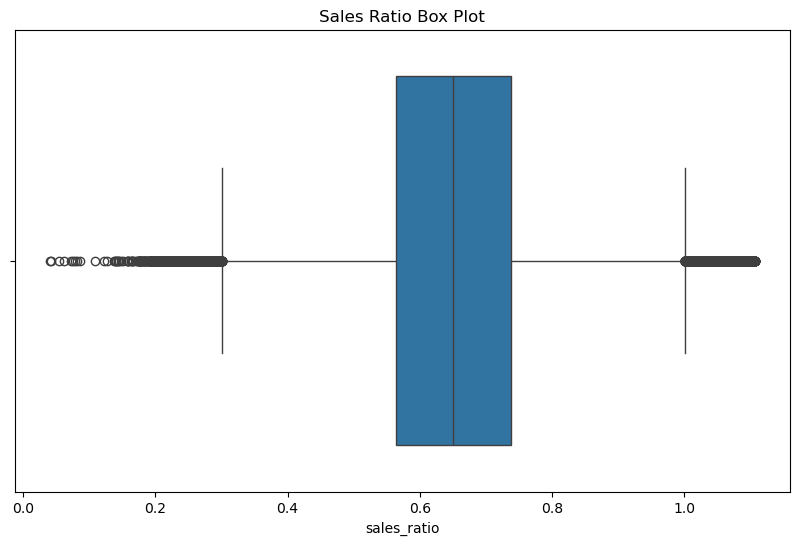

In [17]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_sf['sales_ratio'])
plt.title('Sales Ratio Box Plot')
plt.show()


Insight:

The box plot for the sales ratio shows that the majority of values are concentrated between approximately 0.5 and 0.75, with a median close to 0.6. There are several outliers on the lower end of the distribution, indicating instances where the sales ratio falls well below the typical range. These outliers could represent properties sold significantly below their assessed value. Overall, the distribution appears to be fairly symmetric, with a few extreme cases driving the outliers.

---------------------------------------

#### Correlation Heatmap

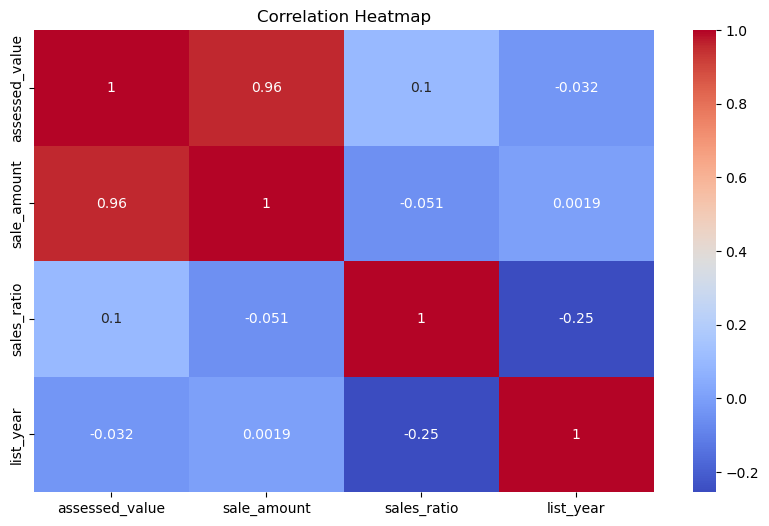

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_sf[['assessed_value', 'sale_amount', 'sales_ratio', 'list_year']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Insight:

The correlation heatmap highlights a strong positive correlation (0.96) between assessed value and sale amount, indicating that these two variables move closely together, which is expected in real estate data. However, the sales ratio has a low correlation with both assessed value (0.10) and sale amount (-0.05), suggesting that the sales ratio is relatively independent of the actual sale amounts or property valuations. Interestingly, the list year has a weak negative correlation with the sales ratio (-0.25), which could suggest some historical patterns where sales ratios have decreased over time.

---------------------------------------------------

#### Sales Ratio vs. Sale Amount 

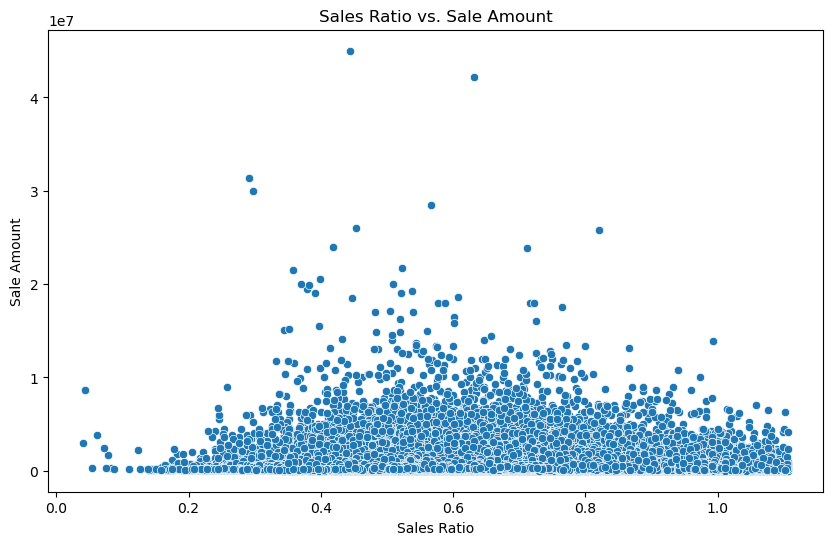

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sf, x='sales_ratio', y='sale_amount')
plt.title('Sales Ratio vs. Sale Amount')
plt.xlabel('Sales Ratio')
plt.ylabel('Sale Amount')
plt.show()


Insight:

The scatter plot reveals no clear linear relationship between the sales ratio and sale amount, which aligns with the low correlation observed in the earlier heatmap. Most of the data points are concentrated around lower sale amounts, with a wide range of sales ratios, indicating that high or low sale prices are not strongly dependent on the sales ratio. Additionally, there are a few outliers with extremely high sale amounts, but these do not seem to follow any distinct trend based on the sales ratio

----------------------------------------------------

#### Assessed Value vs. Sale Amount by Year

c:\DataSciProjects\Real_Estate\env\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


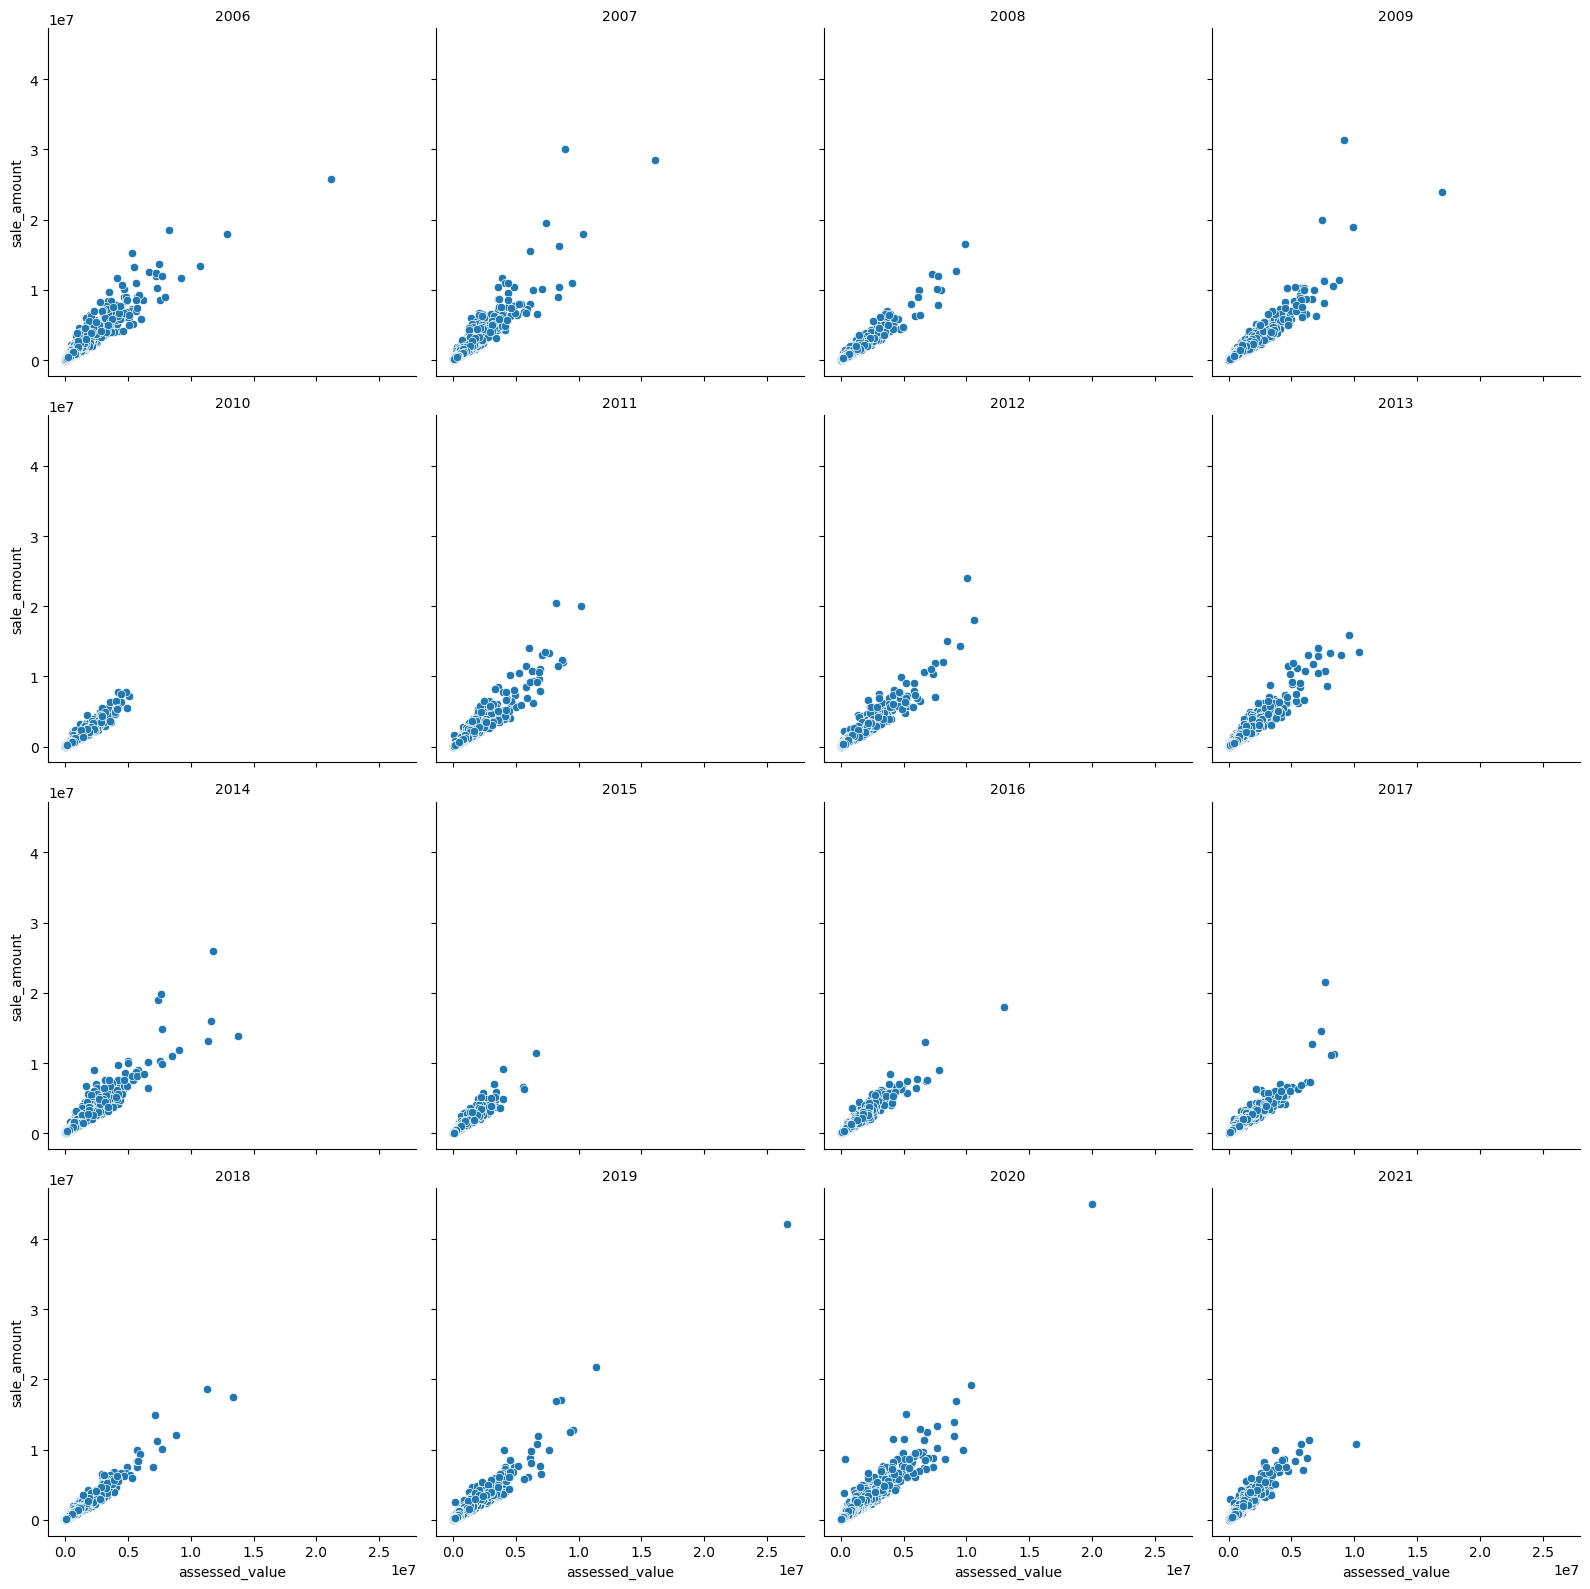

In [20]:
g = sns.FacetGrid(df_sf, col='list_year', col_wrap=4, height=4)
g.map(sns.scatterplot, 'assessed_value', 'sale_amount')
g.set_titles('{col_name}')
plt.show()


Insight:

The scatter plots across different years consistently show a strong positive relationship between assessed value and sale amount, with some variation in the spread of data points each year. In certain years, like 2011 and 2020, there are outliers with higher sale amounts, reflecting periods where more expensive properties were sold. The clustering of points near the lower end of the axes in most years suggests that a majority of homes are assessed and sold within a similar range, while outliers tend to emerge sporadically over time. The consistent trend across the years indicates that assessed value remains a reliable indicator of sale price throughout the dataset.